### Data generation

#### Step change data

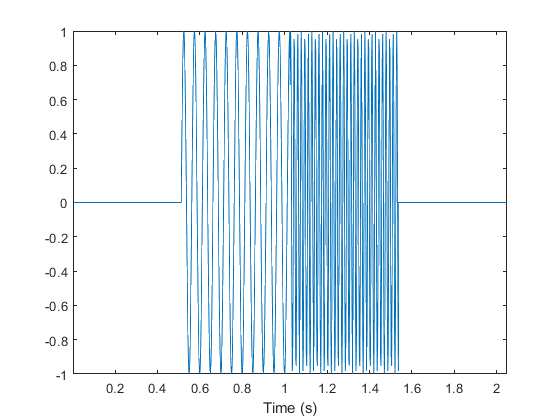

In [28]:
%% Author: Lu, Chia-Feng 2013.11.15
clear, close all

%% initialize parameters
samplerate=500; % in Hz
N=1024; % data length

sinefreq1=20; % in Hz
sinefreq2=60; % in Hz

nfft=64;      % window size for each segment, 
              % try to use 32 or 16 to investigate the trade off between time and frequency resolution 
noverlap=round(nfft*0.5);  % number of overlapping points (50%)

%% generate simulated signals with step changes in frequency
ts=[1:N/4]/samplerate;  % time axis for each segment
data=[zeros(1,N/4) sin(2*pi*sinefreq1*ts) sin(2*pi*sinefreq2*ts) zeros(1,N/4)];

taxis=[1:N]/samplerate;   % time axis for whole data length

figure, 
plot(taxis,data),xlim([taxis(1) taxis(end)])
xlabel('Time (s)')


#### Chirp Signal

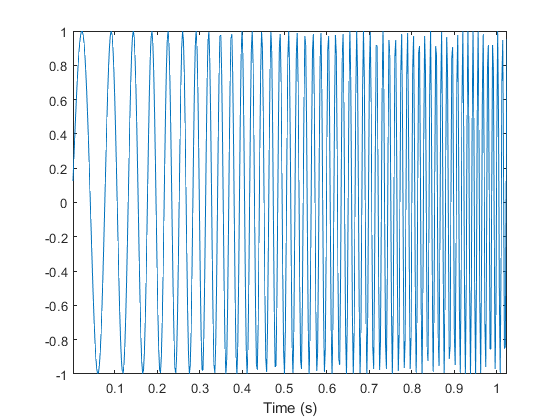

In [32]:
%% Author: Lu, Chia-Feng 2013.11.15
clear, close all

%% initialize parameters
samplerate=500; % in Hz
N=512; % data length

fmin=20; % Minimal frequency in Hz
fmax=100; % Maximal frequency in Hz

nfft=64;      % window size for each segment
noverlap=round(nfft*0.5);  % number of overlapping points (50%)

%% generate a chirp signal
taxis=[1:N]/samplerate;   % time axis for whole data length

fchirp=[1:N]*((fmax-fmin)/N)+fmin;
data=sin(pi*taxis.*fchirp);    % data=sin(2*pi*taxis.*fchirp);

figure, 
plot(taxis,data),xlim([taxis(1) taxis(end)])
xlabel('Time (s)')

### FFT analysis

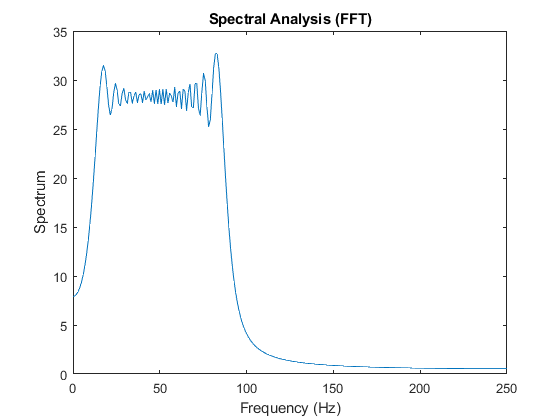

In [33]:
%% Spectral analysis (FFT)
data_freq=fft(data,N);
Mag=abs(data_freq);
faxis=samplerate/2*linspace(0,1,N/2+1);

figure,
plot(faxis,Mag(1:N/2+1)) % represented by dB
title('Spectral Analysis (FFT)')
xlabel('Frequency (Hz)')
ylabel('Spectrum')

### TF analysis using STFT

In [34]:
%% calculate spectrogram using STFT
[spec,faxis,taxis]=spectrogram(data,hamming(nfft),noverlap,nfft,samplerate);
Mag=abs(spec);     % get spectrum magnitude


### 3D plot

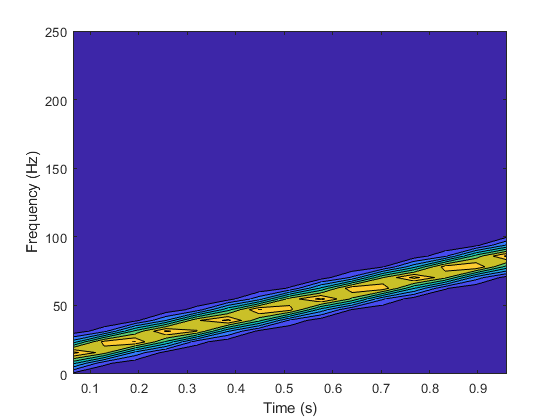

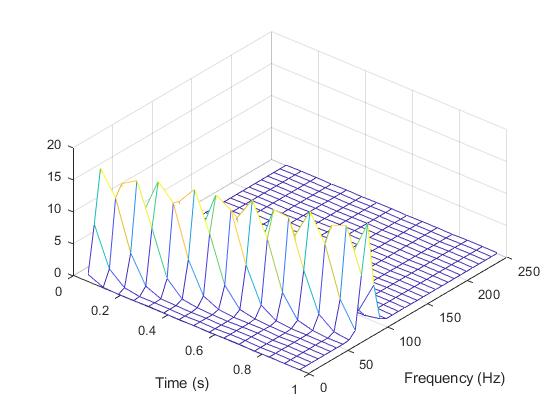

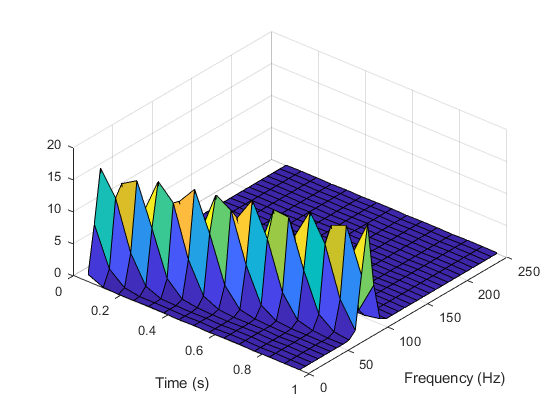

In [35]:
figure,
contourf(taxis,faxis,Mag)   % plot spectrogram as 2D contour
xlabel('Time (s)'),xlim([taxis(1) taxis(end)])
ylabel('Frequency (Hz)')

figure,
mesh(taxis,faxis,Mag)   % plot spectrogram as 3D mesh
view(40,50);           % specify the 3D plot view
xlabel('Time (s)')
ylabel('Frequency (Hz)')

figure,
surface(taxis,faxis,Mag)   % plot spectrogram as 3D surface
view(40,50);           % specify the 3D plot view
xlabel('Time (s)')
ylabel('Frequency (Hz)')
grid on